## Report 6/18/2019

The report below summarizes my work from the last week. You can find all of the code referenced in this notebook at https://github.com/bveeramani/raskutti.

### Model Training

Let's try fitting a logistic regression model on the toy dataset.

In [1]:
import torch

from datasets import OteyP450
from models import LogisticRegressionModel
from train import train, test

train_dataset = OteyP450("OteyP450/processed/train.csv")
test_dataset = OteyP450("OteyP450/processed/test.csv")

model = LogisticRegressionModel(OteyP450.NUM_FEATURES)

model = train(model, train_dataset)
test(model, test_dataset)

Starting training at time 2019-06-17 23:30:09.587911.

BATCH_SIZE=32
NUM_EPOCHS=64
NUM_GPUS=2
DEVICE=cuda:0

INPUT_SHAPE=torch.Size([8])
LABEL_SHAPE=torch.Size([])
DATASET_SIZE=620



c:\users\beta\appdata\local\programs\python\python36\lib\site-packages\torch\cuda\nccl.py:24: UserWarning: PyTorch is not compiled with NCCL support
  warnings.warn('PyTorch is not compiled with NCCL support')


ACCURACY
0.7728



### Explanations

We can view a local attribution for the model by using the LIME explainer. 

C:\Users\Beta\Documents\GitHub\raskutti\explainers.py:98: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


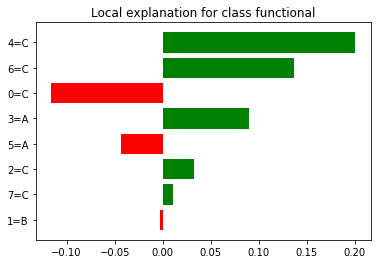

In [6]:
from explainers import OteyP450LimeExplainer

explain = OteyP450LimeExplainer(model, train_dataset)
arbitrary_sample = test_dataset[27]
explain(arbitrary_sample)

We can also select the three most relevent features using the CCM explainer.

In [12]:
from explainers import CCMExplainer

explain = CCMExplainer(3)
explain(train_dataset)

The features selected by CCM are features [4 0 6]


array([4, 0, 6], dtype=int64)

Interestingly, the features selected by CCM are precisely the features with greatest local relevance on the above sample. More analysis is necessary to determine if this is a reoccurring pattern. 

### Comparison

Finally, let's compare our logistic regression model with a feedforward neural network with a bottleneck architecture.

In [16]:
from models import BottleneckMultiLayerPreceptron

model = BottleneckMultiLayerPreceptron(OteyP450.NUM_FEATURES)

model = train(model, train_dataset)
test(model, test_dataset)

Starting training at time 2019-06-17 23:41:13.543111.

BATCH_SIZE=32
NUM_EPOCHS=64
NUM_GPUS=2
DEVICE=cuda:0

INPUT_SHAPE=torch.Size([8])
LABEL_SHAPE=torch.Size([])
DATASET_SIZE=620



c:\users\beta\appdata\local\programs\python\python36\lib\site-packages\torch\cuda\nccl.py:24: UserWarning: PyTorch is not compiled with NCCL support
  warnings.warn('PyTorch is not compiled with NCCL support')


ACCURACY
0.7572



The neural network performed comparably to the logistic regression model. The additive feature attribution for the neural network also behaved similarily on the specified sample.

C:\Users\Beta\Documents\GitHub\raskutti\explainers.py:98: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


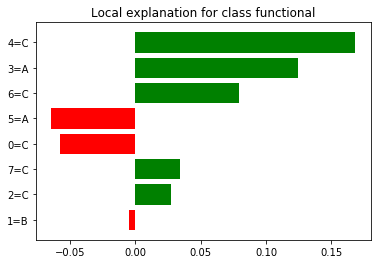

In [17]:
explain = OteyP450LimeExplainer(model, train_dataset)
explain(arbitrary_sample)

The neural network may be overfit to the data. With proper hyperparameter tuning, I suspect that the neural network would outperform the logistic regression model.